# LOD e documentazione storico artistica: i progetti della Fondazione Zeri con esercitazioni di data visualization 
### _Summer school LOD per i Beni culturali, 9 giugno 2021._

#### Sommario

1. Overview: **Il dataset di ARTchives**
<br>
2. **Data Vizualization**: obiettivi e metodi
<br>
3. Case study: **Quali sono i periodi storico-artistici più studiati dagli storici descritti in ARTchives?**
<br>
4. Case study: **Quali sono gli artisti e le personalità studiate dagli storici?**
<br>
5. Case study: **Quali sono i luoghi di studio ed attività degli storici?**





### 1. Overview: **Il dataset di ARTchives**

- Il dataset del progetto ARTchives include informazioni sui grandi __storici dell'arte__ degli ultimi 150 anni, i loro __archivi__, __temi di ricerca__ e le __istituzioni culturali__ che li hanno coinvolti.
- È stato creato per facilitare la ricerca in _storiografia e storia dell'arte_.
- È un dataset ancora in fase embrionale, che raccoglie informazioni su __26 archivi di storici dell'arte__.
- Alta _qualità_ dei dati, inseriti da esperti delle 7 istituzioni partecipanti: _Fondazione Federico Zeri, Getty Research Institute, Università Roma Tre, Scuola Normale Superiore, Bibliotheca Hertziana, Kunsthistorisches Institut in Florenz, Fondazione Longhi_.

<br>
Abbiamo tre principali entità attorno alle quali ruota il dataset:

(1)  __Storici dell'arte__
(2)  __Archivi/collezioni__ degli storici dell'arte 
(3)  __Istituti conservatori__ degli archivi 

ad esse, sono collegate altre entità che identificano persone ed organizzazioni, contenuti, caratteristiche degli archivi ed altro. 
Quando possibile i dati vengono riconciliati con _Wikidata_, altimenti vengono creati URI _ex novo_.





> __Aby Warburg__ --> __http://www.wikidata.org/entity/__Q60185
<br>
> __Fondo Aby Warburg__ --> __https://w3id.org/artchives/__collectionfondo-aby-warburg
<br>
> __main subject__ --> __https://www.wikidata.org/prop/direct/__P921
<br>
> __artista studiato__ --> __https://w3id.org/artchives/__hasSubjectArtis

### Estraiamo la lista di tutti gli storici dell'arte descritti in __ARTchives__:

In [1]:
#! pip install rdflib

import rdflib #python pacage che permette di lavorare con RDF 
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS

#impostiamo un grafo vuoto
g = rdflib.ConjunctiveGraph()

#riempiamo il grafo con il dataset di ARTchives. 
#N-Quads: sintassi per dataset RDF.
#Le dichiarazioni N-quads sono una sequenza di termini RDF che rappresentano il soggetto, il predicato, l'oggetto e l'etichetta del grafo di una tripla RDF e il grafo di cui essa fa parte in un dataset. 
result = g.parse("artchives.nq", format='nquads') 

#associamo un abbreviazione ai namespaces che utilizzeremo 
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
rdfs = Namespace ("http://www.w3.org/2000/01/")


arthistorians = list()
arthistorians_uri = list()

#serie di iterazioni sul grafo di ARTchives
for s,p,o in g.triples(( None, wdt.P170, None)): #people "o" are the creator "wdt.P170" of a collection "s": art historians
    for subj, prop, obj in g.triples((o, RDFS.label, None )):
        if "wikidata.org/entity/" in str(o):  #cerchiamo solo gli storici riconciliati con wikidata        
            if obj.strip() not in arthistorians: #creiamo due liste: una solo composta di URI e l'altra di nomi+URI
                arthistorians.append(obj.strip())
                arthistorians.append('<' + str(o) + '>')
                arthistorians_uri.append('<' + str(o) + '>')


print("-------- Lista dei nomi e dei rispettivi URIs degli storici dell'arte: -------" )
print(arthistorians)



-------- Lista dei nomi e dei rispettivi URIs degli storici dell'arte: -------
['Leo Steinberg', '<http://www.wikidata.org/entity/Q457739>', 'Federico Zeri', '<http://www.wikidata.org/entity/Q1089074>', 'Kurt Badt', '<http://www.wikidata.org/entity/Q1629748>', 'Ellis Waterhouse', '<http://www.wikidata.org/entity/Q3051533>', 'Adolfo Venturi', '<http://www.wikidata.org/entity/Q2824734>', 'Fritz Heinemann', '<http://www.wikidata.org/entity/Q1271052>', 'Stefano Tumidei', '<http://www.wikidata.org/entity/Q55453618>', 'Werner Cohn', '<http://www.wikidata.org/entity/Q18935222>', 'Luigi Salerno', '<http://www.wikidata.org/entity/Q6700132>', 'John Pope-Hennessy', '<http://www.wikidata.org/entity/Q537874>', 'Ernst Kitzinger', '<http://www.wikidata.org/entity/Q88907>', 'Wolfgang Lotz', '<http://www.wikidata.org/entity/Q1296486>', 'Richard Krautheimer', '<http://www.wikidata.org/entity/Q90407>', 'Kornél Fabriczy', '<http://www.wikidata.org/entity/Q995470>', 'Gustav Ludwig', '<http://www.wikidata.o

### 2. **Data Vizualization**: obiettivi e metodi

Le data visualization sono uno strumento estremamente utile per __(1) esplorare i dati__ e __(2) far emergere nuova conoscenza__. 

In entrambi i casi, una buona data visualization dovrebbe sempre:

1. Far emergere patterns di dati
2. Utilizzare solo i dati pertinenti alla ricerca
3. Evidenziare il dato rilevante/eccezionale

Se da un lato __ARTchives__ risponde alla necessità di un aggregatore per la ricerca in storiografia della storia dell'arte, l'implementazione di tecniche di data viz consente un ulteriore passo avanti nella _comprensione_ e nel _riutilizzo dei dati_.
> Obiettivo: stabilire un dialogo tra informazioni provenienti da fonti diverse: superare i _data silos_ per sfruttare un potenziale di conoscenza latente entro . 



Una delle golden rules della DV sono __[le sette fasi della Data Visualization](https://www.oreilly.com/library/view/visualizing-data/9780596514556/ch01.html)__:
1. Acquisizione
2. Parsing
3. Filtraggio
4. Estrazione
5. Rappresentazione
6. Rifinizione
7. Interazione


__Le sette fasi della data visualization in ARTchives__

1. Acquisizione: svolgeremo le nostre analisi a partire dal dataset del progetto ARTchives
2. Parsing: i dati sono modificati attraverso la libreria di Python RDFlib che permette di manipolare i dati di un grafo.
3. Filtraggio: per rispondere a specifiche domande di ricerca dovremo selezionare porzioni specifiche del dataset.
4. Estrazione: attraverso iterazioni sul dataset via Python o con SPARQL queries.
5. Rappresentazione: utilizzermo diverse librerie Python che ci permetteranno di rappresentare graficamente i dati per ricavare nuovi pattern e, possibilmente, nuova conoscenza. 
6. Rifinizione: per semplicità le visualizzazioni saranno già mostrate in fase finale, ma generalmente si procede iterativamente per rifinire sia i dati sottostanti la visualizzazione, che gli aspetti grafici. 
7. Interazione: esploreremo le visualizzazioni per identificarne il valore aggiunto. 




### 3. Case study: **Quali sono i periodi storico-artistici studiati dagli storici descritti in ARTchives?**

Abbiamo già acquisito il dataset per identificare gli storici. 
<br>
A questo punto dobbiamo tenere in considerazione come sono organizzati i nostri dati:
- __Archivi/collezioni__ (individuals della classe *wd:Q9388534*)
- __Subjects degli archivi__ (*wd:Q9388534* > *wdt:P921* > *?subject*)
- Tra i subjects sono presenti i __periodi storico-artistici__, trattati sia da *wdt:P921* tra gli altri, sia da una proprietà dedicata chiamata art:hasSubjectPeriod, che li identifica in maniera esclusiva. 


Andiamo dunque a filtrare i nostri dati attraverso una SPARQL query per ottenere:
- I nomi dei periodi storico-artistici 
- Gli archivi che trattano i periodi.

In [2]:
query_periods = g.query(
    """SELECT (SAMPLE(?coll_label) AS ?coll) (SAMPLE(?label) AS ?period_label) 
    WHERE {?coll <https://w3id.org/artchives/hasSubjectPeriod> ?period ; rdfs:label ?coll_label .
    ?period rdfs:label ?label .}
    GROUP BY ?period ?coll
    ORDER BY ?period_label""") 


Provate ad interrogare __[l'endpoint di ARTchives](http://artchives.fondazionezeri.unibo.it/sparql)__ con la stessa query per vedere i risultati!

Per rendere l'analisi più veloce e mirata, estraiamo i dati di cui abbiamo bisogno in una struttura di dati separata da quella originale. Infatti, fine di utilizzare la gran parte delle librerie python per rappresentare i dati in Jupyter, dobbiamo avere i dati in forma tabulare.
<br>
Andiamo dunque a creare un _file csv_ nel quale andiamo ad inserire i dati appena estratti dal grafo.

In [12]:
!pip install csv

import csv

#apro un file csv in modalità scrittura
with open('periods_count.csv', mode='w') as my_file: 
    #scelgo di dividere i valori con delle virgole e di renderli stringhe
    my_writer = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL) 
    #scrivo i nomi delle colonne
    my_writer.writerow(['collection', 'period_label'])
    
    #accedo ai risultati della query
    for res in query_periods:
        #compilo il file csv con i risultati
        my_writer.writerow([res['coll'], res['period_label'].strip()])
               

Utilizzeremo  __[Pandas](https://pandas.pydata.org/)__, una libreria Python che permette di manipolare i dati in strutture (in questo caso tabulari, che saranno alla base delle nostre visualizzazioni)

In [3]:
!pip install pandas

import pandas as pd

# passo il csv in un dataframe
df = pd.read_csv("periods_count.csv")
#mostro le prime 5 righe
df.head()

,collection,period_label
0,Fototeca Julian Kliemann,mannerism
1,Fototeca Zeri,mannerism
2,"Nachlass Fritz Heinemann, Notizen zur venezian...",mannerism
3,Ellis K. Waterhouse notebooks and research files,mannerism
4,Nachlass Kurt Badt,mannerism


Una volta impostato il file csv con i nostri dati, possiamo già pensare al modo più utile per visualizzarli, a seconda del nostro fine.

Alla nostra domanda di ricerca:
> Quali  sono  i  periodi storico-artistici studiati dagli storici descritti in ARTchives? 

possiamo infatti affidarci a grafiche diverse, a seconda delle caratteristiche dei dati che vogliamo esplorare o enfatizzare.



Possiamo approcciare la domanda puntando ad esaminare l'aspetto __quantitativo__ e __statistico__ dei dati, mostrando *quali periodi sono stati studiati* in relazione a *quanto spesso ricorrono nelle collezioni di ARTchives*.

Utilizziamo la library __[Seaborn](http://seaborn.pydata.org/index.html)__: si tratta una libreria per elaborare grafiche statistiche in Python. Si basa su __[Matplotlib](https://matplotlib.org)__ e si integra strettamente con le strutture dati pandas, come quella che stiamo utilizzando.

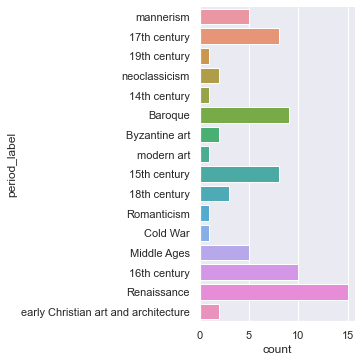

In [4]:
!pip install seaborn
!pip install matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Scegliamo il tema di default
sns.set_theme()

# carichiamo la nostra struttura di dati (df=dataframe)
periods = df

# funzione che conta quante volte un dato ricorre nel dataset e inserisce il risultato in un barcharte
my_plot = sns.catplot(y="period_label", kind="count", data=periods)


Alla stessa domanda di ricerca possiamo rispondere con una visualizzazione completamente diversa, che va ad evidenziare gli __aspetti relazionali__ dei nostri dati: un network.

<br>

Per costruire il nostro network utilizziamo la libreria __[Pyvis](https://pyvis.readthedocs.io/en/latest/)__, una libreria Python derivata da VisJS che permette di costruire network interattivi. 

In [17]:
!pip install pyvis

from pyvis import network as net

people_net = net.Network(height="750px", width="100%", bgcolor="white", font_color="#1cae81", notebook="True", heading="Distribuzione dei periodi storico-artistici")

# set the physics layout of the network
people_net.barnes_hut()
people_data = pd.read_csv("periods_count.csv")

sources = people_data['collection']
targets = people_data['period_label']
#weights = "1"



edge_data = zip(sources, targets)

collections = set()
periods = set()
for e in edge_data:
    #print(e)
    src = e[0]
    dst = e[1]
    
    people_net.add_node(src, src, title=src, color= "#ff9494")
    people_net.add_node(dst, dst, title=dst, color= "#1cae81")
    people_net.add_edge(src, dst, color="grey")
    
        

neighbor_map = people_net.get_adj_list()

#add neighbor data to node hover data
for node in people_net.nodes:
    #print(node)
    if node["color"] == "#ff9494":        
        node["size"] = 80 
    else:
        node["size"] = 80 + (len(neighbor_map[node["id"]])*8)  
    node["borderWidthSelected"] = 5
    node["label"] = node["id"] 
    
    neighbors = set()
    for el in (neighbor_map[node["id"]]):
        neighbors.add(el)
        if node["color"] == "#ff9494":
            node["title"] = "<br>" + "<b>" + node["label"] +  "</b>" +  "<i>" + " <br>" + "</i>"+ "<hr>" + "<i>" +  "<b>" + "Subjects of study" +  "</b>" + "</i>" + "<br>" + "<br>".join(neighbors) + "<br>" + "<hr>"+ "<b>"   
        else:
            node["title"] = "<br>" + "<b>" + node["label"] +  "</b>" +  "<i>" + " <br>" + "</i>"+ "<hr>" + "<i>" +  "<b>" +"Related collections" +   "</b>" +"</i>" + "<br>" + "<br>".join(neighbors) + "<br>" + "<hr>"+ "<b>"   
            
people_net.show("people.html")

Dal network vediamo come emergano due principali aspetti:
- I periodi storico-artistici piu studiati (al centro del network, con diametro maggiore).
- Quali collezioni in particolare trattano dei vari periodi.

A partire da questa visualizzazione, possiamo anche isolare particolari connessioni di nostro interesse.
Possiamo ad esempio individuare solo le collezioni che contengono materiali sul rinascimento, oppure tutti i periodi-storico artistici trattati da un particolare archivio.



Runnate la cella successiva: vedrete apparirà una casella di testo. Provate ad esplorare il network specificando il nome di una collezione o di un periodo storico-artistico (in inglese!) e premete invio.

In [21]:
periodo_o_collezione = input() #premi invio!


KeyboardInterrupt: Interrupted by user

In [19]:
#!pip install pyvis

from pyvis import network as net

people_net = net.Network(height="750px", width="100%", bgcolor="white", font_color="#1cae81", notebook="True", heading=".")

# set the physics layout of the network
people_net.barnes_hut()
people_data = pd.read_csv("periods_count.csv")

sources = people_data['collection']
targets = people_data['period_label']
#weights = "1"

print(periodo_o_collezione)

edge_data = zip(sources, targets)

collections = set()
periods = set()
for e in edge_data:
    src = e[0]
    dst = e[1]
    
    if dst.lower() == periodo_o_collezione:
        people_net.add_node(src, src, title=src, color= "#ff9494")
        people_net.add_node(dst, dst, title=dst, color= "#1cae81")
        people_net.add_edge(src, dst, color="grey")
    
    elif src.lower() == periodo_o_collezione:
        people_net.add_node(src, src, title=src, color= "#ff9494")
        people_net.add_node(dst, dst, title=dst, color= "#1cae81")
        people_net.add_edge(src, dst, color="grey")

neighbor_map = people_net.get_adj_list()

#add neighbor data to node hover data
for node in people_net.nodes:
    #print(node)
    if node["color"] == "#ff9494":        
        node["size"] = 80 #+ (len(neighbor_map[node["id"]])*10)  
    else:
        node["size"] = 80 + (len(neighbor_map[node["id"]])*8)  
    node["borderWidthSelected"] = 5
    node["label"] = node["id"] 
    
    neighbors = set()
    for el in (neighbor_map[node["id"]]):
        neighbors.add(el)
        if node["color"] == "#ff9494":
            node["title"] = "<br>" + "<b>" + node["label"] +  "</b>" +  "<i>" + " <br>" + "</i>"+ "<hr>" + "<i>" +  "<b>" + "Subjects of study" +  "</b>" + "</i>" + "<br>" + "<br>".join(neighbors) + "<br>" + "<hr>"+ "<b>"   
        else:
            node["title"] = "<br>" + "<b>" + node["label"] +  "</b>" +  "<i>" + " <br>" + "</i>"+ "<hr>" + "<i>" +  "<b>" +"Related collections" +   "</b>" +"</i>" + "<br>" + "<br>".join(neighbors) + "<br>" + "<hr>"+ "<b>"   
            
people_net.show("people.html")

fototeca zeri


Gli archivi degli storici dell'arte sono ricchi di interconnessioni, di temi, di soggetti di studio e di collaborazioni, motivo per cui sono un ottimo caso d'uso per evidenziare i benefici dei LOD. 
Il network che abbiamo visto è un ottimo esempio di come una visualizzazione possa fornire degli input per formulare ulteriori domande di ricerca. Attorno ai periodi-storico artistici più studiati, si addensano dei custers, ossia degli insiemi di elementi - le collezioni - che sono accomunati dall'avere più periodi di studio in comune. Ma questo elemento può bastare per constatare l'effettiva esistenza di una interconnessione fra queste collezioni?

### 4. Case study: **Quali sono gli artisti e le personalità studiate dagli storici?**

Similmente ai periodi storico-artistici, anche gli artisti e le personalità studiate dagli storici dell'arte rientrano nei subjects degli archivi. Sono identificati sia genericamente, attraverso la proprietà _P921_ che in maniera specifica attraverso da properità ad hoc _hasSubjectArtist_

<br>
Saltiamo, in questo caso, per semplicità, l'estrazione dei dati e analizziamo direttamente i risultati:


In [42]:
df = pd.read_csv("artists.csv")
# print the first 5 rows
df.head()

,subj1,subj2,weight
0,Caravaggio,Luigi Salerno,1
1,Federico Zeri,Luigi Salerno,1
2,Giulio Mancini,Luigi Salerno,1
3,Giovanni Lanfranco,Luigi Salerno,1
4,Filippo Napoletano,Luigi Salerno,1


Aggiungiamo al network un grado di complessità: vedete un numero sotto la colonna "weight", che rappresenta il peso della relazione fra gli elementi della colonna subj1 e della colonna subj2, ossia l'importanza della loro relazione nel network. In questo modo, il network sarà graficamente bilanciato sulla base del peso delle relazioni.

Come abbiamo aggiunto un peso alle relazioni?
- Nella relazione fra storici dell'arte, più sono gli artisti studiati in comune, più la relazione è "pesante".
- Fra storico dell'arte e artista, la relazione è più pesante se, oltre all'artista, lo storico è specializzato nel periodo storico-artistico in cui si colloca l'artista.


In [20]:
people_net = net.Network(height="750px", width="100%", bgcolor="white", font_color="#1cae81", notebook="True", heading="Distribuzione delle relazioni degli storici dell'arte con i loro oggetti di studio")

# set the physics layout of the network
people_net.barnes_hut()
people_data = pd.read_csv("artists.csv")

sources = people_data['subj1']
targets = people_data['subj2']
weights = people_data['weight']


edge_data = zip(sources, targets, weights)

for e in edge_data:
    #print(e)
    src = e[0]
    dst = e[1]
    w = e[2]


    people_net.add_node(src, src, title=src, color= "#1cae81")
    people_net.add_node(dst, dst, title=dst, color= "#1cae81")
    if w == 1:
        people_net.add_edge(src, dst, value=w, color="grey")
    elif w == 2:
        people_net.add_edge(src, dst, value=w, color="#F63489")
    elif w == 3:
        people_net.add_edge(src, dst, value=w, color="black")
    
        

neighbor_map = people_net.get_adj_list()

# add neighbor data to node hover data
for node in people_net.nodes:
    #print(node)
    
    node["size"] = 80 + (len(neighbor_map[node["id"]])*10)   
    node["borderWidthSelected"] = 5
    node["label"] = node["id"] 
    historians = set()
    artists = set()
    for el in (neighbor_map[node["id"]]):
        if el in arthistorians:
            historians.add(el)
        else: 
            artists.add(el)
    if node["label"] in arthistorians:
        node["color"] = "#23f5ad"
        uripos = arthistorians.index(node["label"])+1
        uri = arthistorians[uripos]
        #print(node["label"], uri)
        if len(historians) > 0:
            node["title"] = "<br>" + "<b>" + node["label"] +  "</b>" +  "<i>" + "  relations:<br>" + "</i>"+ "<hr>" + "<b>" + "Subjects of study" + "</b>" + "<br>" + "<br>".join(artists) + "<br>" + "<hr>"+ "<b>" + "Art historians" + "</b>" + "<br>" + "<br>".join(historians)  
        else:
            node["title"] = "<br>" + "<b>" + node["label"] +   "</b>" +  "<i>" + "  relations:<br>" + "</i>"+ "<hr>" + "<b>" + "Subjects of study" + "</b>" + "<br>" + "<br>".join(artists) + node["label"] + "</a>" 
    else: 
        node["title"] = "<br>" + "<b>" + node["label"] + "</b>" +  "<i>" + "  relations:<br>" + "</i>"+ "<hr>" + "<b>" + "Art historians" + "</b>" + "<br>" + "<br>".join(historians) + "<br>" 
   
people_net.show("people.html")

- Nel primo cluster troviamo _Ernst Steinmann_, _Konrnèl Fabriczy_, _John Pope-Hennessy_ ed _Everett Fahy_, che gravitano on particolare attorno a __Michelangelo__ e __Botticelli__.
- Nel secondo cluster (al centro) _Richard Krautheimer_, _Federico Zeri_, _Stefano Tumidei_ e _Wolfgang Lotz_ accomunati dallo studio di __Gian Lorenzo Bernini__. 
- Nel terzo _Fritz Heinemann_, _Gustav Ludwig_, _Leo Steinberg_ e _Luisa Vertova_, a partire dallo studio di __Vittore Carpaccio, Titian__ e __Giovanni Bellini__.

- Sempre importante diversificare fra le relazioni certe (storico dell'arte-artista) e le relazioni supposte (fra storici dell'arte)

### 5. Case study: Quali sono i luoghi di studio ed attività degli storici?

Se con i network ci siamo concentrati su aspetti relazionali, ora andiamo ad esplorare la __distribuzione spaziale__ dei nostri dati.

Fino ad ora il nostro focus è rimasto sulle collezioni, ora spostiamo la nostra attenzione sui __percorsi di studio e formazione__ dei singoli storici, per individuarne le traiettorie di formazione.

Il nostro punto di partenza (dataset di ARTchives):
- Su ARTchives abbiamo indicizzati alcuni luoghi, senza indicazione di coordinate (elemento chiave per la rappresentazione geospaziale).
    
Di cosa abbiamo bisogno:
- Coordinate
- Altri eventuali collegamenti con luoghi di formazione ed attività, ricavabili da altri dataset.

Case study rappresentativo per l'integrazione di dati da Linked Open Dataset diversi: ARTchives + Wikidata. 

Cosa recuperariamo da Wikdiata:
- altri eventuali luoghi associati agli storici dell'arte
 - coordinate di tutti i luoghi individuati (sia quelli ricavati a Wikidata, che quelli già presenti in artchives)

Partimo dall'individuazione dei luoghi correlati agli storici dell'arte presenti su Wikidata.
<br>
__[SPARQLWrapper](https://pypi.org/project/SPARQLWrapper/)__ aiuta a gestire query su endpoint esterni e ad esporare i risultati nel formato desiderato (JSON, nel nostro caso.

In [24]:
!pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import os.path
import json

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

if os.path.isfile("query1.json"):
    f = open('query1.json')
    results = json.load(f)

    # prepare the values to be queried
else:
    historians = ' '.join(arthistorians_uri) # <uri1> <uri2> <uri3> ... <uriN>
    # prepare the query: for each historian in ARTchives check in wikidata if there are work or education places.
    formationplace_query = """ 
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    SELECT DISTINCT ?historian ?workplace ?workplace_label ?coordinates1 ?eduplace ?eduplace_label ?coordinates2
    WHERE {
            VALUES ?historian {"""+historians+"""} . 
            optional {?historian wdt:P108 ?workplace . 
            ?workplace rdfs:label ?workplace_label .
            FILTER (langMatches(lang(?workplace_label), "EN")) 
            ?workplace wdt:P625 ?coordinates1; wdt:P31 ?type . 
            ?type rdfs:label ?type_label . 
            FILTER (langMatches(lang(?type_label), "EN"))}
            optional {?historian wdt:P69 ?eduplace . 
            ?eduplace rdfs:label ?eduplace_label .
            FILTER (langMatches(lang(?eduplace_label), "EN")) 
            ?eduplace wdt:P625 ?coordinates2; wdt:P31 ?type . 
            ?type rdfs:label ?type_label . 
            FILTER (langMatches(lang(?type_label), "EN")) }
            } 
    GROUP BY ?historian ?workplace ?workplace_label ?coordinates1 ?eduplace ?eduplace_label ?coordinates2 
    """
    
        # set the endpoint 
    sparql_wd = SPARQLWrapper(wikidata_endpoint)
        # set the query
    sparql_wd.setQuery(formationplace_query)
        # set the returned format
    sparql_wd.setReturnFormat(JSON)
        # get the results
    results = sparql_wd.query().convert()
    
    with open('query1.json', 'w') as f:
        json.dump(results, f)




        # manipulate the result
for result in results["results"]["bindings"]:
    historian_uri = result["historian"]["value"]
    if "workplace" in result: 
        workplace = result["workplace"]["value"]
        if "workplace_label" in result and "coordinates1" in result: 
            workplace_label = result["workplace_label"]["value"]
            work_coord = result["coordinates1"]["value"][6:-1].split(" ")
            print(historian_uri)
            print("work:", workplace, workplace_label)

                    # only if uri, label and coords are found we add them to the graph
            g.add(( URIRef(historian_uri) , URIRef(wdt.P108) , URIRef(workplace) ))
            g.add(( URIRef(workplace) , RDFS.label , Literal(workplace_label) ))
            g.add(( URIRef(workplace) , URIRef(wdt.P625) , Literal(work_coord) ))
            
                    
            
    if "eduplace" in result: 
        eduplace = result["eduplace"]["value"]
        if "eduplace_label" in result and "coordinates2" in result: 
            eduplace_label = result["eduplace_label"]["value"]
            eduplace_coord = result["coordinates2"]["value"][6:-1].split(" ")
            print(historian_uri)
            print("education:", eduplace, eduplace_label)
                    # only if both uri and label are found we add them to the graph
            g.add(( URIRef(historian_uri) , URIRef(wdt.P69) , URIRef(eduplace) ))
            g.add(( URIRef(eduplace) , RDFS.label , Literal(eduplace_label) ))
            g.add(( URIRef(eduplace) , URIRef(wdt.P625) , Literal(eduplace_coord) ))
            

http://www.wikidata.org/entity/Q457739
work: http://www.wikidata.org/entity/Q49117 University of Pennsylvania
http://www.wikidata.org/entity/Q457739
education: http://www.wikidata.org/entity/Q49210 New York University
http://www.wikidata.org/entity/Q457739
work: http://www.wikidata.org/entity/Q49117 University of Pennsylvania
http://www.wikidata.org/entity/Q457739
education: http://www.wikidata.org/entity/Q49210 New York University
http://www.wikidata.org/entity/Q3051533
work: http://www.wikidata.org/entity/Q230899 University of Manchester
http://www.wikidata.org/entity/Q2824734
work: http://www.wikidata.org/entity/Q209344 Sapienza University of Rome
http://www.wikidata.org/entity/Q3051533
work: http://www.wikidata.org/entity/Q230899 University of Manchester
http://www.wikidata.org/entity/Q3057287
work: http://www.wikidata.org/entity/Q154804 Leipzig University
http://www.wikidata.org/entity/Q3057287
education: http://www.wikidata.org/entity/Q154804 Leipzig University
http://www.wikidat

http://www.wikidata.org/entity/Q457739
work: http://www.wikidata.org/entity/Q13371 Harvard University
http://www.wikidata.org/entity/Q457739
education: http://www.wikidata.org/entity/Q49210 New York University
http://www.wikidata.org/entity/Q457739
work: http://www.wikidata.org/entity/Q13371 Harvard University
http://www.wikidata.org/entity/Q457739
education: http://www.wikidata.org/entity/Q49210 New York University
http://www.wikidata.org/entity/Q457739
work: http://www.wikidata.org/entity/Q13371 Harvard University
http://www.wikidata.org/entity/Q457739
education: http://www.wikidata.org/entity/Q49210 New York University
http://www.wikidata.org/entity/Q61913691
work: http://www.wikidata.org/entity/Q3558578 Harvard University Center for Italian Renaissance Studies
http://www.wikidata.org/entity/Q1089074
education: http://www.wikidata.org/entity/Q209344 Sapienza University of Rome
http://www.wikidata.org/entity/Q90407
work: http://www.wikidata.org/entity/Q49210 New York University
http:

Esporto i dati nel grafo aggiornato:

In [15]:
g.serialize(destination='artchives_luoghi.nq', format='nquads') #Desktop/dhdk_epds/resources/
result = g.parse("artchives_luoghi.nq", format='nquads')

Ora verifichiamo le informazioni che abbiamo appena aggiunto al grafo e le inseriamo in un dizionario che sarà alla base della nostra ultima visualizzazione.

In [47]:
luoghi = {}
for storico, proprietà, luogo in g.triples((None, wdt.P69, None)):
    for l, nome, nome_del_luogo in g.triples((luogo, RDFS.label, None)):
        for location, hascoordinates, coordinate in g.triples((luogo, wdt.P625, None)):
            for stor, proprietà, nome_dello_storico in g.triples(( storico, RDFS.label, None)):
                if "wikidata.org/entity/" in str(storico):
                    valore = (nome_del_luogo.strip(), "<" + luogo.strip() +">", float(coordinate.split(" ")[1][1:-2][0:6]), float(coordinate.split(" ")[0][2:-2][0:6]))
                    chiave = ("<" + stor.strip() +">", nome_dello_storico.strip())
                    if chiave not in luoghi.keys():
                        luoghi[chiave] = set([valore])
                    else:
                        luoghi[chiave].update([valore])
for k, v in luoghi.items():
    print(k, v)

('<http://www.wikidata.org/entity/Q90407>', 'Richard Krautheimer') {('University of Halle-Wittenberg', '<http://www.wikidata.org/entity/Q32120>', 51.486, 11.968), ('Humboldt University of Berlin', '<http://www.wikidata.org/entity/Q152087>', 52.518, 13.393), ('University of Marburg', '<http://www.wikidata.org/entity/Q155354>', 50.81, 8.7736), ('Vassar College', '<http://www.wikidata.org/entity/Q2093794>', 41.686, -73.89)}
('<http://www.wikidata.org/entity/Q1089074>', 'Federico Zeri') {('Sapienza University of Rome', '<http://www.wikidata.org/entity/Q209344>', 41.903, 12.515)}
('<http://www.wikidata.org/entity/Q3057287>', 'Ernst Steinmann') {('Leipzig University', '<http://www.wikidata.org/entity/Q154804>', 51.338, 12.378)}
('<http://www.wikidata.org/entity/Q3051533>', 'Ellis Waterhouse') {('University of Oxford New College', '<http://www.wikidata.org/entity/Q1376987>', 51.754, -1.251), ('New College', '<http://www.wikidata.org/entity/Q1376987>', 51.754, -1.251)}
('<http://www.wikidata.o

Andiamo ora ad estrarre i nostri luoghi da ARTchives. Come:
1) Estrazione dei subject.
2) Individuazione fra essi, dei luoghi (= coloro che hanno coordinate) tramite wikidata.
3) Estrazione delle coordinate.

In [48]:
related = {} #dictionary to collect the main subjects of an art historian -p921- present in ARTchives data 
for s,p,o in g.triples(( None, wdt.P170, None)):   
    if "wikidata.org/entity/" in str(o):           
        for hist, prop, obj in g.triples((o, wdt.P921, None)):     
            for subj, pr, name in g.triples(( hist, RDFS.label, None)):   
                key = tuple(['<' + str(hist) + '>', name.strip()])
                value = '<' + str(obj) + '>'
                if key not in related.keys(): #the dict has as keys the historians and as values the relative list of main subjects.
                    related[key] = [value]
                else:
                    related[key].append(value)
    
for k, v in related.items():
    print(k, v)




('<http://www.wikidata.org/entity/Q1715096>', 'Ulrich Middeldorf') ['<http://www.wikidata.org/entity/Q183>', '<http://www.wikidata.org/entity/Q183>', '<http://www.wikidata.org/entity/Q152087>', '<http://www.wikidata.org/entity/Q152087>', '<http://www.wikidata.org/entity/Q2143255>', '<http://www.wikidata.org/entity/Q2143255>', '<http://www.wikidata.org/entity/Q5597>', '<http://www.wikidata.org/entity/Q5597>', '<http://www.wikidata.org/entity/Q1361667>', '<http://www.wikidata.org/entity/Q1361667>', '<http://www.wikidata.org/entity/Q317053>', '<http://www.wikidata.org/entity/Q317053>', '<http://www.wikidata.org/entity/Q7787>', '<http://www.wikidata.org/entity/Q7787>', '<http://www.wikidata.org/entity/Q55044>', '<http://www.wikidata.org/entity/Q55044>', '<http://www.wikidata.org/entity/Q714972>', '<http://www.wikidata.org/entity/Q714972>', '<http://www.wikidata.org/entity/Q2044>', '<http://www.wikidata.org/entity/Q2044>', '<http://www.wikidata.org/entity/Q70804>', '<http://www.wikidata.org

Cerchiamo le coordinate dei luoghi individuati, interrogando Wikidata.

In [49]:
for k, v in related.items():  #for each art historian I extract those main subjects which are defined as places in wikidatata 
    relatedlist = ' '.join(v)
    query_results = """
        PREFIX wdt: <http://www.wikidata.org/prop/direct/>
        SELECT DISTINCT ?place ?place_label ?coord (group_concat(?type_label ; separator="; ") as ?label) 
        WHERE {
            VALUES ?place {"""+relatedlist+"""} . 
            ?place rdfs:label ?place_label . 
            FILTER (langMatches(lang(?place_label), "EN")) . 
            ?place wdt:P625 ?coord; wdt:P31 ?type . 
            ?type rdfs:label ?type_label . 
            FILTER (langMatches(lang(?type_label), "EN"))
            } 
            group by ?place ?place_label ?coord ?label
        """

    # set the endpoint 
    sparql_wd = SPARQLWrapper(wikidata_endpoint)
    # set the query
    sparql_wd.setQuery(query_results)
    # set the returned format
    sparql_wd.setReturnFormat(JSON)
    # get the results
    results = sparql_wd.query().convert()
    


    for result in results["results"]["bindings"]:
        place = '<' + str(result["place"]["value"]) + '>'
        place_name = result["place_label"]["value"]
        coord = result["coord"]["value"][6:-1].split(" ")
        type_label = result["label"]["value"].split("; ")[0]
        type_label_list = type_label.split(" ")
        place_info = tuple([place_name, place, float(coord[1][0:6]), float(coord[0][0:6])])
        #print(key)
        for value in v:
            if k not in luoghi.keys():
                luoghi[k] = set([place_info])
            else:
                luoghi[k].add(place_info)
                

                
for k, v in luoghi.items():
    print(k, v)


('<http://www.wikidata.org/entity/Q90407>', 'Richard Krautheimer') {('Marburg', '<http://www.wikidata.org/entity/Q3869>', 50.816, 8.7666), ('University of Louisville', '<http://www.wikidata.org/entity/Q1317143>', 38.215, -85.76), ('United States of America', '<http://www.wikidata.org/entity/Q30>', 39.828, -98.57), ('University of Halle-Wittenberg', '<http://www.wikidata.org/entity/Q32120>', 51.486, 11.968), ('Ludwig Maximilian University of Munich', '<http://www.wikidata.org/entity/Q55044>', 48.15, 11.58), ('Palazzetto Zuccari', '<http://www.wikidata.org/entity/Q1277188>', 41.905, 12.483), ('Germany', '<http://www.wikidata.org/entity/Q183>', 51.0, 10.0), ('Rome', '<http://www.wikidata.org/entity/Q220>', 41.893, 12.482), ('United States', '<http://www.wikidata.org/entity/Q30>', 39.828, -98.57), ('New York University', '<http://www.wikidata.org/entity/Q49210>', 40.73, -73.99), ('Vassar College', '<http://www.wikidata.org/entity/Q2093794>', 41.686, -73.89), ('Erfurt', '<http://www.wikidat

Filtrati i nostri dati, procediamo con la visualizzazione. Decidiamo di utilizzare una mappa geografica e di implementarla tramite la library  __[IpyLeaflet](https://ipyleaflet.readthedocs.io/en/latest/)__, costruita a partire dalla famosa library di JavaScript, ma customizzata per Jupyter Notebook.

In [54]:
! pip install ipyleaflet
! pip install ipywidgets

from ipyleaflet import LayerGroup, Map, Marker, Popup, LayersControl, AwesomeIcon
from ipywidgets import HTML

import random 
center = (41.080684, -30.683374)

colors = ['red', 'darkred', 'lightred', 'orange', 'beige', 'green', 'darkgreen', 'lightgreen', 'blue', 'darkblue', 'lightblue', 'purple', 'darkpurple', 'pink', 'cadetblue', 'gray', 'lightgray', 'black']


m = Map(center=center, zoom=3, close_popup_on_click=False)
control = LayersControl(position='topright')
m.add_control(control)

for k,v in luoghi.items():
    layer_group = LayerGroup(layers=(), name=k[1]) #creating different layers for different historians
    m.add_layer(layer_group)
    #print(k, v)
    icon2 = AwesomeIcon(
        name = "map-marker",
        marker_color= random.choice(colors),
        icon_color='white',
        spin=False
        )
    for value in v:
        #print(value)
        marker = Marker(icon = icon2, location=(value[2], value[3]))
        message = HTML()
        
        message.description = ""
        message.value ="<b>" + "<a href='http://artchives.fondazionezeri.unibo.it/historian-" + k[0][32:-1] +"'>" + k[1] + "</a>" + "</b>" + "<br>"  + value[0]
        marker.popup = message
        layer_group.add_layer(marker)





m

Map(center=[41.080684, -30.683374], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zo…

Questo tipo di visualizzazione spaziale ci permette di:
- Evidenziare immediatamente quale sia la distribuzione dei luoghi rilevanti per gli studi di storia dell'arte nel '900. 
> - Effettivamente, un cluster è presente in corrispondenza con l'Italia e la Germania, in linea con lo sviluppo della storia dell'arte come disciplina accademica e le varie scuole europee.
> - È anche evidente una densificazione di marker sulla costa orientale americana, in particolare nell'area di New York. Questo potrebbe essere collegato al processo per cui, dopo la guerra civile americana, gli Stati Uniti divennero una delle principali potenze economiche e imperiali, che iniziò anche a esprimere la sua influenza attraverso manifestazioni culturali e sociali. Ciò implicò una grande espansione sia delle istituzioni museali americane che delle pratiche di collezionismo privati che attirò un gran numero di esperti europei
- Identificare i percorsi di formazione dei singoli storici.






### Prospettive future

Abbiamo visto come sviluppare data visualization per evidenziare:
   - aspetti statistici
   - aspetti relazionali
   - aspetti geospaziali

Una prospettiva su cui stiamo lavorando è l'interrelazione fra questi aspetti, per verificare se la copresenza di features diverse abbia degli effettivi riscontri nei contenuti degli archivi e nelle biografie degli storici dell'arte. Ci stiamo concentrando sullo sviluppo di euristiche e visualizzazioni che suggeriscano percorsi di ricerca per andare oltre il dato di cui siamo effettivamente in possesso. 

Grazie!
<br>
<br>
__Francesca Mambelli__ francesca.mambelli6@unibo.it
<br>
__Lucia Giagnolini__ lucia.giagnolini2@unibo.it
